<a href="https://colab.research.google.com/github/jayshah19/Advanced-prognostication-using-Neural-Networks/blob/main/Advanced_prognostication_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid_word = pd.read_csv('drive/MyDrive/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176454,ZWE,Africa,Zimbabwe,2022-03-31,246286.0,104.0,156.000,5444.0,4.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
176455,ZWE,Africa,Zimbabwe,2022-04-01,246414.0,128.0,109.857,5444.0,0.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
176456,ZWE,Africa,Zimbabwe,2022-04-02,246481.0,67.0,119.429,5446.0,2.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
176457,ZWE,Africa,Zimbabwe,2022-04-03,246525.0,44.0,100.714,5446.0,0.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176459 entries, 0 to 176458
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    176459 non-null  object 
 1   continent                                   166113 non-null  object 
 2   location                                    176459 non-null  object 
 3   date                                        176459 non-null  object 
 4   total_cases                                 170133 non-null  float64
 5   new_cases                                   169954 non-null  float64
 6   new_cases_smoothed                          167959 non-null  float64
 7   total_deaths                                152049 non-null  float64
 8   new_deaths                                  152061 non-null  float64
 9   new_deaths_smoothed                         149896 non-null  float64
 

In [ ]:
fields = ['iso_code', 'continent', 'location', 'tests_units' , 'total_vaccinations' , 'total_tests','new_tests' ]
covid_word[fields]

,iso_code,continent,location,tests_units,total_vaccinations,total_tests,new_tests
0,AFG,Asia,Afghanistan,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
176454,ZWE,Africa,Zimbabwe,tests performed,9368822.0,NaN,NaN
176455,ZWE,Africa,Zimbabwe,tests performed,9481194.0,2185767.0,NaN
176456,ZWE,Africa,Zimbabwe,NaN,9600524.0,NaN,NaN
176457,ZWE,Africa,Zimbabwe,NaN,9694465.0,NaN,NaN


In [ ]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
176454    2022-03-31
176455    2022-04-01
176456    2022-04-02
176457    2022-04-03
176458    2022-04-04
Name: date, Length: 176459, dtype: object

In [ ]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,176459,166113,176459,94115
unique,242,6,242,4
top,MEX,Africa,Mexico,tests performed
freq,825,41067,825,70069


In [ ]:
c_covid = covid_word[covid_word['location'] == "India"]

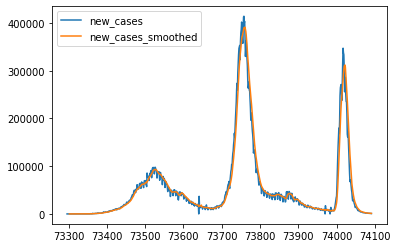

In [ ]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()

In [ ]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
73302,0.0,0.429
73303,0.0,0.286
73304,0.0,0.286
73305,0.0,0.286
73306,0.0,0.143
...,...,...
74087,1335.0,1343.286
74088,1260.0,1286.143
74089,1096.0,1239.714
74090,913.0,1188.714


In [ ]:
def lag_correlation_ts(y, x, lag):
    
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

In [ ]:
y_dataset = c_covid['new_cases']
y_dataset

73302       0.0
73303       0.0
73304       0.0
73305       0.0
73306       0.0
          ...  
74087    1335.0
74088    1260.0
74089    1096.0
74090     913.0
74091     795.0
Name: new_cases, Length: 790, dtype: float64

     Correlation
Lag             
0         1.0000
1         0.9946
2         0.9863
3         0.9778
4         0.9673
5         0.9552
6         0.9428
7         0.9272
8         0.9043
9         0.8792
10        0.8547
11        0.8295
12        0.8034
13        0.7783
14        0.7508
15        0.7182
16        0.6854
17        0.6543
18        0.6236
19        0.5934
20        0.5649
21        0.5360
22        0.5038
23        0.4725
24        0.4438
25        0.4162
26        0.3896
27        0.3651
28        0.3407
29        0.3141
30        0.2889


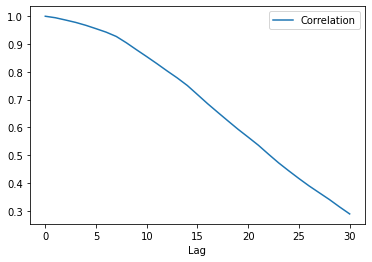

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 30)) #For time series we should use y_Dataset like input and output
print(l)
l.plot()

In [ ]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    
    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 14)
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
73316,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
73317,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
73318,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
73319,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
73320,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74087,"1,335.0000","1,225.0000","1,233.0000","1,259.0000","1,270.0000","1,421.0000","1,660.0000","1,685.0000","1,938.0000","1,778.0000","1,581.0000","1,549.0000","1,761.0000","2,075.0000","2,528.0000","1,335.0000"
74088,"1,260.0000","1,335.0000","1,225.0000","1,233.0000","1,259.0000","1,270.0000","1,421.0000","1,660.0000","1,685.0000","1,938.0000","1,778.0000","1,581.0000","1,549.0000","1,761.0000","2,075.0000","1,260.0000"
74089,"1,096.0000","1,260.0000","1,335.0000","1,225.0000","1,233.0000","1,259.0000","1,270.0000","1,421.0000","1,660.0000","1,685.0000","1,938.0000","1,778.0000","1,581.0000","1,549.0000","1,761.0000","1,096.0000"
74090,913.0000,"1,096.0000","1,260.0000","1,335.0000","1,225.0000","1,233.0000","1,259.0000","1,270.0000","1,421.0000","1,660.0000","1,685.0000","1,938.0000","1,778.0000","1,581.0000","1,549.0000",913.0000


In [ ]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')
Target: new_cases


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

In [ ]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test_ln = reg.predict(X_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [ ]:
from sklearn import metrics
print("Correlation train", reg.score(X_train, y_train))
print("Correlation test", reg.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.9967337574431303
Correlation test 0.9879919833694559
Mean Absolute Error: 46659.7090128461
Mean Squared Error: 8314261734.7566
Root Mean Squared Error: 91182.57363529832


In [ ]:
def BP_model(X):
    
    
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 600

batch_size=int(y_train.shape[0]*.1)

estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


In [ ]:
fitting = True
fitting_save = True

import pickle

if fitting:
    history=estimator.fit(X_train,y_train, validation_data=(X_test,y_test)) # Fitting model
    if fitting_save:
        
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)

from keras.models import load_model


estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

estimator.model = load_model('BP_saved_model.h5')    
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/600
11/11 [==============================] - 1s 21ms/step - loss: 0.0485 - val_loss: 0.0236
Epoch 2/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0135
Epoch 3/600
11/11 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0104
Epoch 4/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0078
Epoch 5/600
11/11 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0077
Epoch 6/600
11/11 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0066
Epoch 7/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 8/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 9/600
11/11 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 10/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


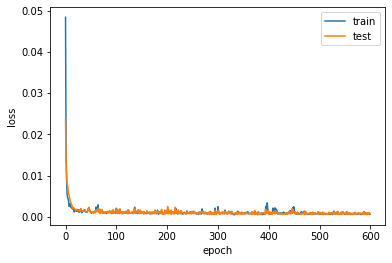

In [ ]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

In [ ]:
res_tr=estimator.predict(X_train)
res_ts=estimator.predict(X_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

5/5 [==============================] - 0s 2ms/step


In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.9980243676375837
Correlation train 0.9916603973324319
Mean Absolute Error: 49578.07163884788
Mean Squared Error: 8949415047.148455
Root Mean Squared Error: 94601.34801972145


In [ ]:
train_x_LSTM = X_train.reshape((X_train.shape[0], 1, 14))
test_x_LSTM = X_test.reshape((X_test.shape[0], 1, 14))

In [ ]:
from keras.layers import LSTM

batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(7, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mae', optimizer='adam')


In [ ]:
fitting = True
fitting_save = True
epochs = 300

if fitting:
    history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False)    
    if fitting_save:
    
        model_json = model.to_json()
        with open("LSTM_model.json", "w") as json_file:
            json_file.write(model_json)
        
        model.save_weights("LSTM_model.h5")
        print("Saved model to disk")
        with open('history_LSTM.pickle', 'wb') as f:
            pickle.dump(history.history, f)

from keras.models import model_from_json
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("LSTM_model.h5")        
with open('history_LSTM.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/300
11/11 [==============================] - 3s 48ms/step - loss: 0.1348 - val_loss: 0.0974
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1241 - val_loss: 0.0917
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 0.1172 - val_loss: 0.0903
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 0.1125 - val_loss: 0.0904
Epoch 5/300
11/11 [==============================] - 0s 6ms/step - loss: 0.1083 - val_loss: 0.0908
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: 0.1049 - val_loss: 0.0917
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 0.1028 - val_loss: 0.0926
Epoch 8/300
11/11 [==============================] - 0s 6ms/step - loss: 0.1003 - val_loss: 0.0928
Epoch 9/300
11/11 [==============================] - 0s 6ms/step - loss: 0.0972 - val_loss: 0.0922
Epoch 10/300
11/11 [==============================] - 0s 5ms/step - loss: 0.0969 - val_loss: 0.0908
Epoch 11

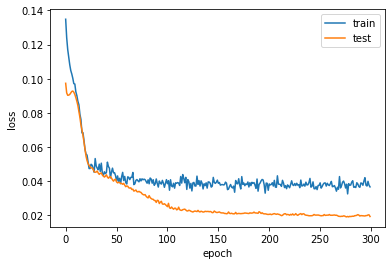

In [ ]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show() 

In [ ]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

Correlation train 0.9956768169236843
Correlation train 0.9821788185099664
Mean Absolute Error: 45003.15386499124
Mean Squared Error: 7465199265.212461
Root Mean Squared Error: 86401.38462555135


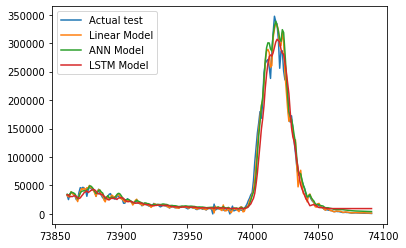

In [ ]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

In [ ]:
model.save("APNN.h5")